
Training with SGD (momentum=0.9) optimizer...


C:\Users\chala\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
844/844 - 2s - 2ms/step - accuracy: 0.7996 - loss: 0.5697 - val_accuracy: 0.8457 - val_loss: 0.4263
Epoch 2/10
844/844 - 1s - 2ms/step - accuracy: 0.8520 - loss: 0.4104 - val_accuracy: 0.8585 - val_loss: 0.3889
Epoch 3/10
844/844 - 1s - 2ms/step - accuracy: 0.8663 - loss: 0.3677 - val_accuracy: 0.8685 - val_loss: 0.3566
Epoch 4/10
844/844 - 1s - 2ms/step - accuracy: 0.8752 - loss: 0.3408 - val_accuracy: 0.8715 - val_loss: 0.3588
Epoch 5/10
844/844 - 1s - 2ms/step - accuracy: 0.8812 - loss: 0.3250 - val_accuracy: 0.8725 - val_loss: 0.3451
Epoch 6/10
844/844 - 1s - 2ms/step - accuracy: 0.8866 - loss: 0.3095 - val_accuracy: 0.8720 - val_loss: 0.3421
Epoch 7/10
844/844 - 1s - 2ms/step - accuracy: 0.8906 - loss: 0.2972 - val_accuracy: 0.8812 - val_loss: 0.3268
Epoch 8/10
844/844 - 1s - 2ms/step - accuracy: 0.8931 - loss: 0.2868 - val_accuracy: 0.8832 - val_loss: 0.3208
Epoch 9/10
844/844 - 1s - 2ms/step - accuracy: 0.8968 - loss: 0.2759 - val_accuracy: 0.8762 - val_loss: 0.3468
E

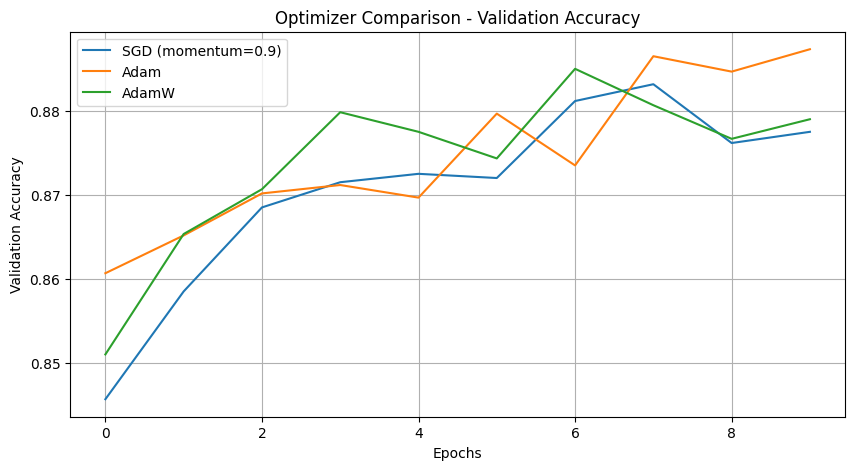

In [1]:
# ------------------------------
# Deep Learning Optimizer Comparison
# ------------------------------
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 1. Load Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize pixel values

# 2. Common model structure function
def create_model():
    """Creates a simple dense network for comparison."""
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),   # Convert 28x28 to 1D vector
        keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        keras.layers.Dense(10, activation='softmax')  # Output layer: 10 classes
    ])
    return model


# 3. Dictionary of optimizers to test
optimizers = {
    "SGD (momentum=0.9)": keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
    "Adam": keras.optimizers.Adam(learning_rate=0.001),
    "AdamW": keras.optimizers.AdamW(learning_rate=0.001, weight_decay=1e-4)
}

# 4. Train model with each optimizer and store results
histories = {}

for name, opt in optimizers.items():
    print(f"\nTraining with {name} optimizer...")
    model = create_model()  # fresh model each time
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=opt,
                  metrics=["accuracy"])
    history = model.fit(X_train, y_train,
                        epochs=10,
                        batch_size=64,
                        validation_split=0.1,
                        verbose=2)
    histories[name] = history

# 5. Plot training vs validation accuracy for all optimizers
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    plt.plot(history.history["val_accuracy"], label=name)

plt.title("Optimizer Comparison - Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/10
844/844 - 3s - 3ms/step - accuracy: 0.8204 - loss: 0.5161 - val_accuracy: 0.8590 - val_loss: 0.3947
Epoch 2/10
844/844 - 2s - 2ms/step - accuracy: 0.8621 - loss: 0.3856 - val_accuracy: 0.8647 - val_loss: 0.3757
Epoch 3/10
844/844 - 2s - 2ms/step - accuracy: 0.8751 - loss: 0.3442 - val_accuracy: 0.8738 - val_loss: 0.3394
Epoch 4/10
844/844 - 2s - 2ms/step - accuracy: 0.8843 - loss: 0.3166 - val_accuracy: 0.8665 - val_loss: 0.3633
Epoch 5/10
844/844 - 2s - 2ms/step - accuracy: 0.8918 - loss: 0.2968 - val_accuracy: 0.8852 - val_loss: 0.3196
Epoch 6/10
844/844 - 1s - 2ms/step - accuracy: 0.8971 - loss: 0.2792 - val_accuracy: 0.8802 - val_loss: 0.3286
Epoch 7/10
844/844 - 1s - 2ms/step - accuracy: 0.9025 - loss: 0.2645 - val_accuracy: 0.8772 - val_loss: 0.3567
Epoch 8/10
844/844 - 3s - 3ms/step - accuracy: 0.9070 - loss: 0.2542 - val_accuracy: 0.8875 - val_loss: 0.3137
Epoch 9/10
844/844 - 2s - 2ms/step - accuracy: 0.9099 - loss: 0.2437 - val_accuracy: 0.8803 - val_loss: 0.3407
E

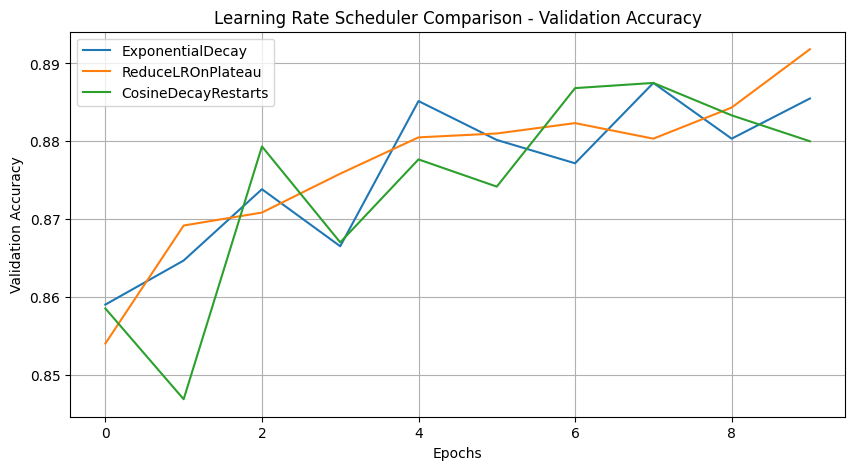

In [2]:
# ------------------------------
# Learning Rate Scheduling Examples
# ------------------------------
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# 1. Load and normalize Fashion-MNIST data
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# 2. Simple dense model function
def create_model(lr_schedule):
    """Create model using given learning rate schedule."""
    model = keras.models.Sequential([
        keras.layers.Flatten(input_shape=[28, 28]),
        keras.layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        keras.layers.Dense(10, activation='softmax')
    ])

    # AdamW with gradient clipping and scheduler
    optimizer = keras.optimizers.AdamW(
        learning_rate=lr_schedule,  # dynamic learning rate
        weight_decay=1e-4,
        clipnorm=1.0   # prevent exploding gradients
    )

    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=optimizer,
                  metrics=["accuracy"])
    return model

# 3. Learning rate schedules
# ------------------------------------
initial_lr = 0.001

# (A) Exponential Decay
exp_decay = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=initial_lr,
    decay_steps=1000,
    decay_rate=0.96,
    staircase=False
)

# (B) ReduceLROnPlateau (via callback)
reduce_lr_cb = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,       # reduce LR by half
    patience=2,       # wait 2 epochs without improvement
    min_lr=1e-6,
    verbose=1
)

# (C) Cosine Decay Restarts
cosine_decay = keras.optimizers.schedules.CosineDecayRestarts(
    initial_learning_rate=initial_lr,
    first_decay_steps=1000
)

# 4. Train using each scheduler
histories = {}

# (1) Exponential Decay
model_exp = create_model(exp_decay)
history_exp = model_exp.fit(X_train, y_train,
                            epochs=10,
                            batch_size=64,
                            validation_split=0.1,
                            verbose=2)
histories["ExponentialDecay"] = history_exp

# (2) ReduceLROnPlateau
model_plateau = create_model(initial_lr)
history_plateau = model_plateau.fit(X_train, y_train,
                                    epochs=10,
                                    batch_size=64,
                                    validation_split=0.1,
                                    verbose=2,
                                    callbacks=[reduce_lr_cb])
histories["ReduceLROnPlateau"] = history_plateau

# (3) Cosine Decay Restarts
model_cosine = create_model(cosine_decay)
history_cosine = model_cosine.fit(X_train, y_train,
                                  epochs=10,
                                  batch_size=64,
                                  validation_split=0.1,
                                  verbose=2)
histories["CosineDecayRestarts"] = history_cosine

# 5. Plot validation accuracy for each scheduler
plt.figure(figsize=(10, 5))
for name, history in histories.items():
    plt.plot(history.history["val_accuracy"], label=name)

plt.title("Learning Rate Scheduler Comparison - Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()
